# * Descriptors Filter
### 1) nan값 제거
### 2) Kurtosis
### 3) 상관계수 r -> PCA 

# * i-qsar
### 1) r^2
### 2) kurtosis
### 3) Shannon entropy

![fil](https://github.com/Siny-K/image/blob/master/fil.PNG?raw=true)
[corr](https://github.com/Siny-K/image/blob/master/corr.PNG?raw=true)

## Dragon 결과파일 : 1st.txt
### 1st.txt의 Descriptors 갯수 : 분자 100개 29개의 그룹모두 1906개의 디스크립터 (근데 왜 4885개 안 나오는건지?)


### (Scriptor file for running Dragon : d_scriptor.drs)
[opthon](https://github.com/Siny-K/image/blob/master/list.PNG?raw=true

[디스크립터 그룹](http://www.talete.mi.it/products/dragon_molecular_descriptors.htm

[디스크립터 목록] (http://www.talete.mi.it/products/dragon_molecular_descriptor_list.pdf



In [20]:
f = open('1st.txt')
item = f.readline()
item = item.split()
print len(item)

    

1906


### NAN값 제거 필터
### input : 1st.txt
### output : 2nd.csv

In [2]:
import pandas as pd
import numpy as np
csv_file =  pd.read_csv('1st.txt',sep='\t')

# how to use head fuction
# print csv_file.head(n=2) 

# Get header if CSV
csv_headr = list(csv_file.columns.values)

A = csv_file.isnull().any()

for fact in enumerate(A) :
    if fact[1] == True :
        col_Nan = csv_headr[fact[0]]
        del csv_file[col_Nan]
        
#print csv_file

csv_file.to_csv("2nd.csv", sep=",")



###  nan제거 후 2nd.csv 파일의 Descriptors 갯수
### 1906 -> (+1첫번째 칼럼) 1900  
### Descriptors 7개 감소 

In [1]:
f = open('2nd.csv')
item = f.readline()
item = item.split(',')
print len(item)


1900


In [6]:
import pandas as pd
import numpy as np
data=pd.read_csv('2nd.csv')
test_data = data  #사본생성

# kurtosis 계산 + 0이하 목록에서 지우기
## 얻어진 값이 0보다 크지만 3보다 작으면 분포는 완첨(playkurtic, 평평함)이라고 하고, 3과 같으면 중첨(mesokurtic, 높이가 정상적임)이라고 한다. 또한 3보다 크면 급첨(leptokurtic, 뾰족함)이라고 한다.

In [7]:
import pandas as pd
import numpy as np
import scipy.stats.stats as st

header = list(test_data.columns.values)   # 디스크립터 항목만 빼내기

# print header
col_kur_skew = {}

for i in header :
    col_kur_skew[i] = [ st.kurtosis(test_data[i]) , st.skew(test_data[i])]

a = 0 
b = 0
for i in col_kur_skew :
    b = b+1
    if col_kur_skew[i][0] < 3 :
        a = a +1 
        del test_data[i]

#print test_data
print '원래','=',b
print '3이하','=',a  
print '남은 디스크립터','=',b-a
label = list(test_data.columns.values) 

원래 = 1900
3이하 = 933
남은 디스크립터 = 967


## 상관계수 구하기 -Table

In [8]:
import pandas as pd
import numpy as np
import scipy.stats.stats as st
from pandas import DataFrame, Series

#data=pd.read_csv('2nd.csv')

#data2=data.ix[:,3:]   #id와 분자 이름 날리기, 하지만 kurtosis계산에서 다 날아감 왜냐면 첨도가 0보다 작게 나와서

a = test_data.corr()
test_data.corr()


,MW,Sv,Se,Mp,nSK,SCBO,nH,nC,nN,nP,...,DLS_03,DLS_06,DLS_07,LLS_02,CMC-80,Inflammat-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Infective-80
MW,1.000000,0.938927,0.911639,0.096151,0.974938,0.934761,0.654584,0.666468,0.521055,0.613286,...,-0.210283,-0.812562,-0.751670,-0.777160,0.181993,0.313270,0.285474,0.015454,2.707966e-01,0.192450
Sv,0.938927,1.000000,0.986406,-0.031352,0.978959,0.944840,0.840059,0.860208,0.541564,0.393696,...,-0.167618,-0.706714,-0.670371,-0.676561,0.347418,0.475791,0.457681,0.109430,4.081035e-01,0.305860
Se,0.911639,0.986406,1.000000,-0.169106,0.953460,0.890072,0.896869,0.821363,0.512254,0.408428,...,-0.143797,-0.697473,-0.675726,-0.661062,0.335895,0.472841,0.462486,0.106054,4.060367e-01,0.275861
Mp,0.096151,-0.031352,-0.169106,1.000000,0.000158,0.115225,-0.334811,0.057646,-0.006051,0.027276,...,-0.026954,-0.002733,0.016590,-0.105709,0.024417,0.004795,-0.018493,0.014717,-7.078624e-03,0.186020
nSK,0.974938,0.978959,0.953460,0.000158,1.000000,0.976177,0.725705,0.780526,0.568307,0.481495,...,-0.209869,-0.772357,-0.710162,-0.726679,0.256997,0.370974,0.348954,0.057153,3.266558e-01,0.227925
SCBO,0.934761,0.944840,0.890072,0.115225,0.976177,1.000000,0.633400,0.806977,0.617167,0.407651,...,-0.228219,-0.727244,-0.646638,-0.681147,0.285020,0.362670,0.336420,0.073012,3.179420e-01,0.268941
nH,0.654584,0.840059,0.896869,-0.334811,0.725705,0.633400,1.000000,0.796256,0.369582,0.174013,...,-0.027715,-0.445350,-0.483069,-0.434419,0.437968,0.576423,0.585087,0.183897,4.809087e-01,0.343983
nC,0.666468,0.860208,0.821363,0.057646,0.780526,0.806977,0.796256,1.000000,0.402946,-0.058549,...,-0.074454,-0.369516,-0.369051,-0.375397,0.515501,0.615670,0.590121,0.220089,5.222908e-01,0.445776
nN,0.521055,0.541564,0.512254,-0.006051,0.568307,0.617167,0.369582,0.402946,1.000000,0.170048,...,-0.415650,-0.605537,-0.423112,-0.555107,0.119891,0.031681,0.120714,0.007545,2.464071e-02,0.174388
nP,0.613286,0.393696,0.408428,0.027276,0.481495,0.407651,0.174013,-0.058549,0.170048,1.000000,...,-0.097264,-0.631084,-0.603146,-0.562511,-0.115815,-0.056107,-0.080169,-0.080169,-6.857477e-02,-0.115815


## Heat Map 

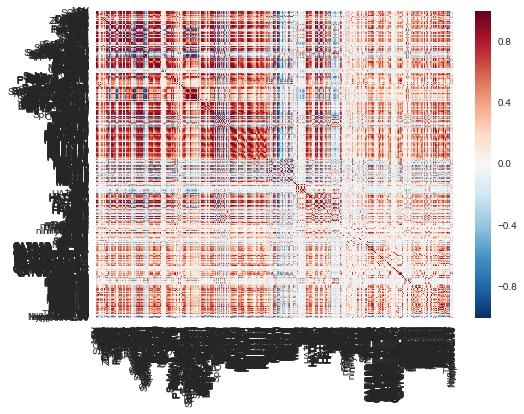

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
sns.heatmap(a)

# Clustering

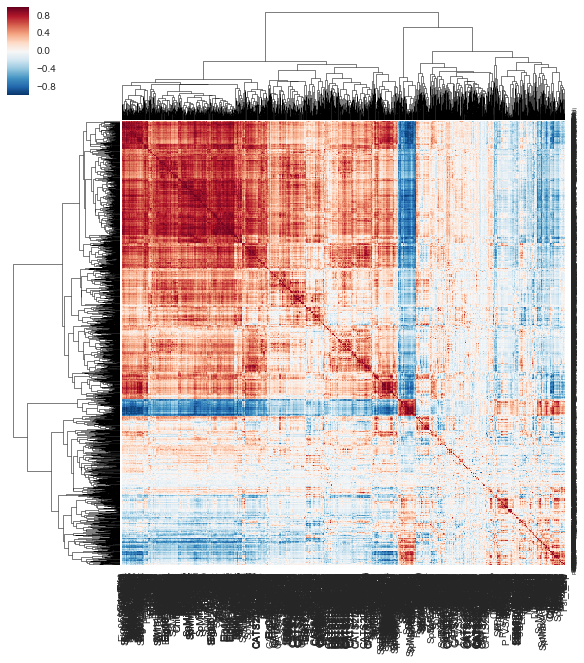

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
cm = sns.clustermap(a)
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=5)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*1, hm.height])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*1, col.height*1])

In [5]:
from scipy.cluster.hierarchy import ward, dendrogram
%matplotlib inline
linkage_matrix = ward(a) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(20,25)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

NameError: name 'plt' is not defined

# PCA
![e](https://github.com/Siny-K/image/blob/master/dd.PNG?raw=true)

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

df = pd.DataFrame(a)

#pca = PCA(n_components=2)
#pca.fit(df)
#pca.components_ 


pca=PCA(n_components=5)
pca.fit(df)

PCA(copy=True, n_components=5, whiten=False)

In [11]:
pca.components_

array([[-0.04947086, -0.05239987, -0.05246806, ..., -0.00418248,
        -0.01893436, -0.01145244],
       [ 0.019398  , -0.00925632, -0.01051261, ..., -0.02028568,
        -0.03872053, -0.03993292],
       [-0.01265793,  0.0074979 ,  0.01090961, ...,  0.01561949,
         0.02429443,  0.01747348],
       [ 0.00315854,  0.00326209, -0.01453223, ..., -0.00132909,
        -0.02006774,  0.02434874],
       [-0.0274644 , -0.01429095, -0.00873135, ..., -0.01114096,
        -0.03058319, -0.05015564]])

In [13]:
print(pca.explained_variance_ratio_)

[ 0.77763072  0.07907653  0.05100734  0.02698763  0.01765473]


In [12]:
print label

['MW', 'AMW', 'Sv', 'Se', 'Mv', 'Me', 'Mp', 'Mi', 'nSK', 'nBM', 'SCBO', 'RBN', 'nDB', 'nAB', 'nH', 'nC', 'nN', 'nO', 'nP', 'nS', 'nCL', 'nHM', 'nHet', 'H%', 'N%', 'X%', 'nCsp3', 'nCsp2', 'nCIC', 'nCIR', 'TRS', 'Rperim', 'Rbrid', 'RFD', 'nR05', 'nR06', 'nR09', 'nR10', 'nBnz', 'ARR', 'D/Dtr05', 'D/Dtr06', 'D/Dtr09', 'D/Dtr10', 'ZM1V', 'ZM1Kup', 'ZM1Mad', 'ZM2V', 'ON0', 'ON0V', 'ON1V', 'Qindex', 'SNar', 'Xt', 'Ram', 'BLI', 'Pol', 'MSD', 'ECC', 'DECC', 'MDDD', 'CENT', 'ICR', 'SMTIV', 'Wap', 'S1K', 'S2K', 'PHI', 'PW2', 'PW4', 'MAXDN', 'MAXDP', 'DELS', 'TIE', 'Psi_i_s', 'Psi_i_t', 'Psi_i_0d', 'Psi_i_1d', 'Psi_i_1s', 'Psi_e_0', 'Psi_e_t', 'BAC', 'LOC', 'MWC02', 'SRW05', 'SRW10', 'MPC03', 'MPC04', 'MPC08', 'MPC09', 'MPC10', 'piPC01', 'piPC02', 'piPC03', 'piPC04', 'piPC08', 'piPC09', 'piPC10', 'TPC', 'piID', 'PCD', 'X2', 'X3', 'X4', 'X5', 'X1A', 'X2A', 'X3A', 'X4A', 'X5A', 'X0v', 'X1v', 'X2v', 'X3v', 'X4v', 'X5v', 'X0Av', 'X2Av', 'X3Av', 'X4Av', 'X2sol', 'X3sol', 'X4sol', 'X5sol', 'RDCHI', 'RDS

AttributeError: 'str' object has no attribute 'pop'

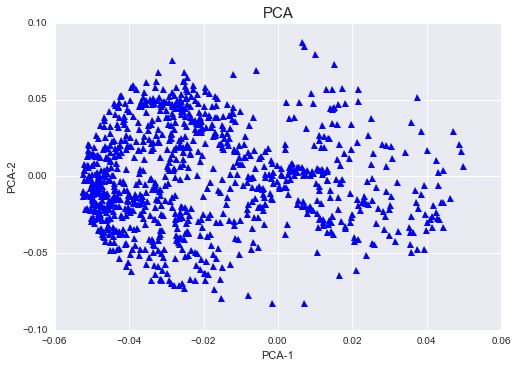

In [19]:
import matplotlib.pyplot as plt
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA', fontsize=15)
plt.plot(pca.components_[0],pca.components_[1],'b^')
for i in range(len(label)):
    #plt.text(pca.components_[0][i]+0.01,pca.components_[1][i]+0.01,label[i],None,'left') 라벨툴이기
    plt.text(pca.components_[0][i]+0.01,pca.components_[1][i]+0.01,None,'left')

# 참고 코드

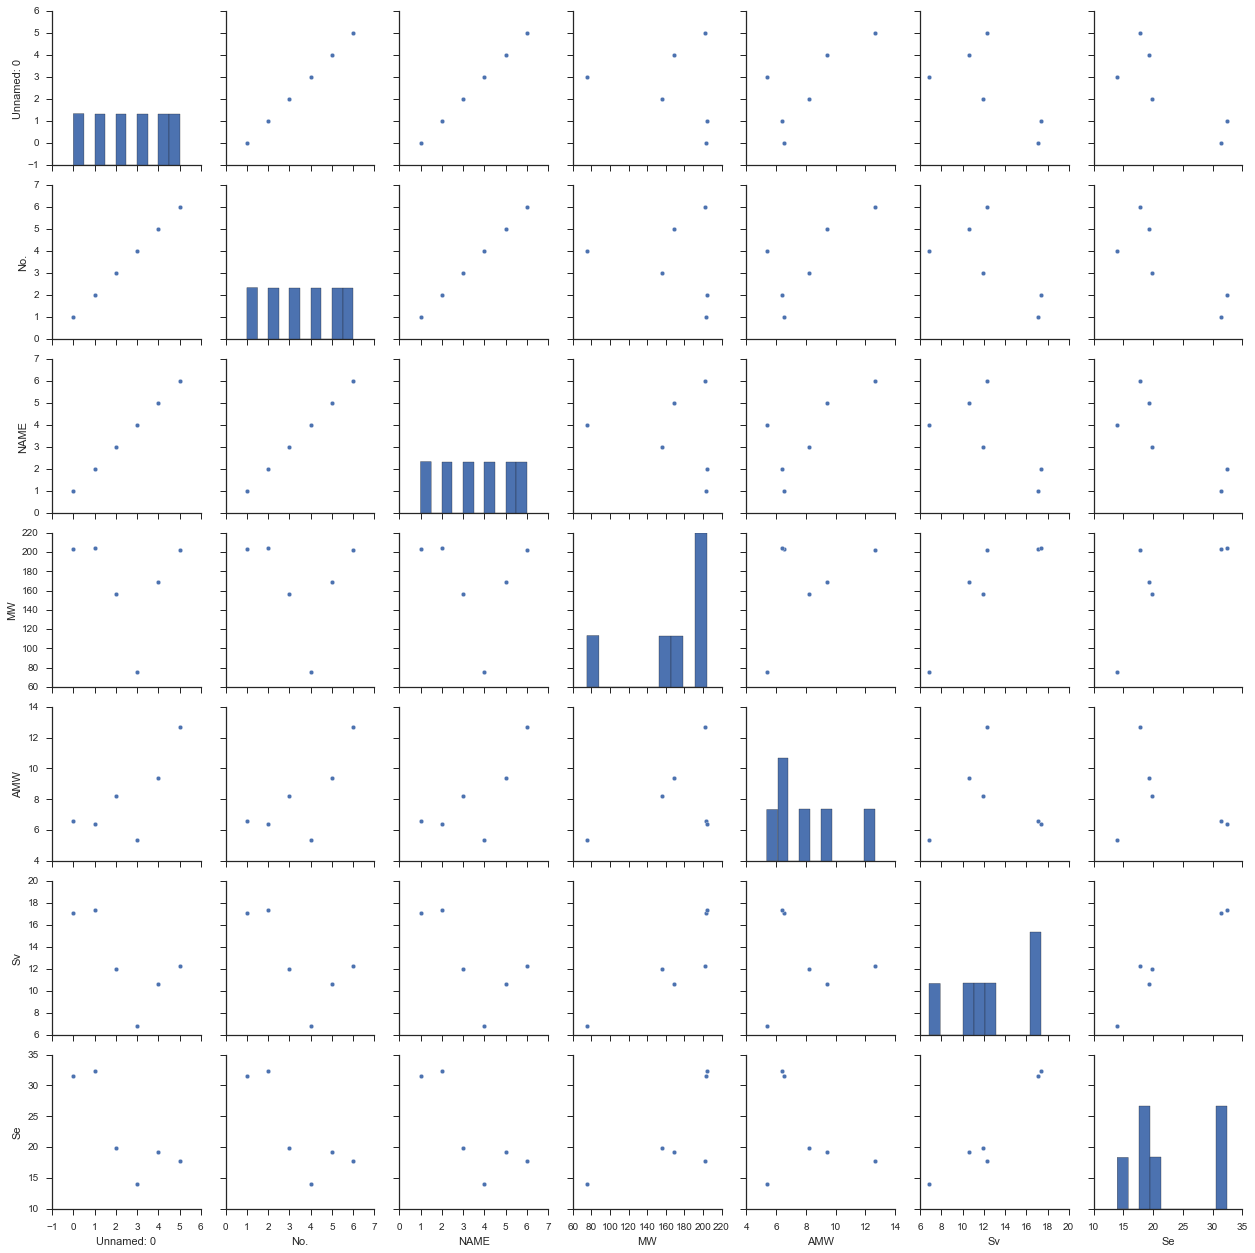

In [8]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import numpy as np
%matplotlib inline
iris =  pd.read_csv('nini.csv')
sns.pairplot(iris)

<IPython.core.display.Javascript object>


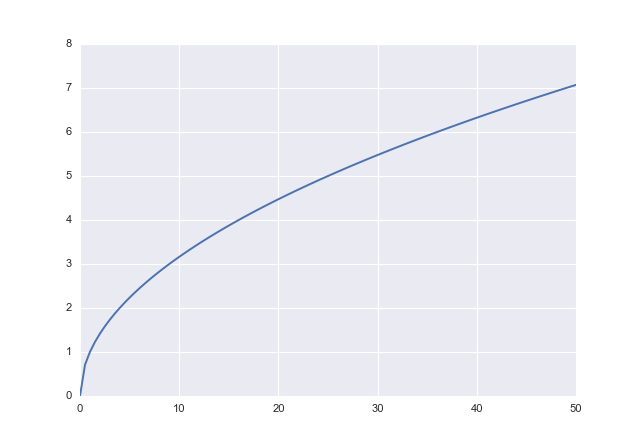

In [5]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 50, 100)
y = x**(0.5)

plt.plot(x, y)

<IPython.core.display.Javascript object>


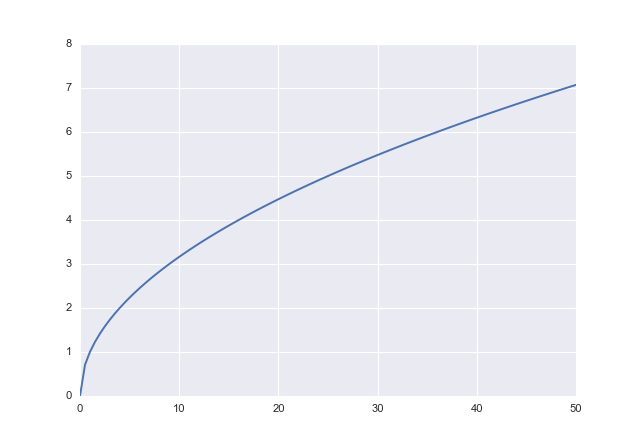

In [6]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

sns.heatmap(a)

x = np.linspace(0, 50, 100)
y = x**(0.5)

plt.plot(x, y)

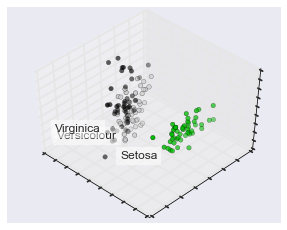

In [29]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

x_surf = [X[:, 0].min(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].max()]
y_surf = [X[:, 0].max(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].min()]
x_surf = np.array(x_surf)
y_surf = np.array(y_surf)
v0 = pca.transform(pca.components_[[0]])
v0 /= v0[-1]
v1 = pca.transform(pca.components_[[1]])
v1 /= v1[-1]

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()